In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

/tmp/ipykernel_4875/1865091544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax["Hours Studied"] = (datax["Hours Studied"] - datax["Hours Studied"].min()) / (datax["Hours Studied"].max() - datax["Hours Studied"].min())
/tmp/ipykernel_4875/1865091544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax["Previous Scores"] = (datax["Previous Scores"] - datax["Previous Scores"].min()) / (datax["Previous Scores"].max() - datax["Previous Scores"].min())
/tmp/ipykernel_4875/1865091544.py:5: SettingWi

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

/tmp/ipykernel_4875/1865091544.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sample Question Papers Practiced'], label='Sample Question Papers Practiced', color='green')
/tmp/ipykernel_4875/1865091544.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sleep Hours'], label='S

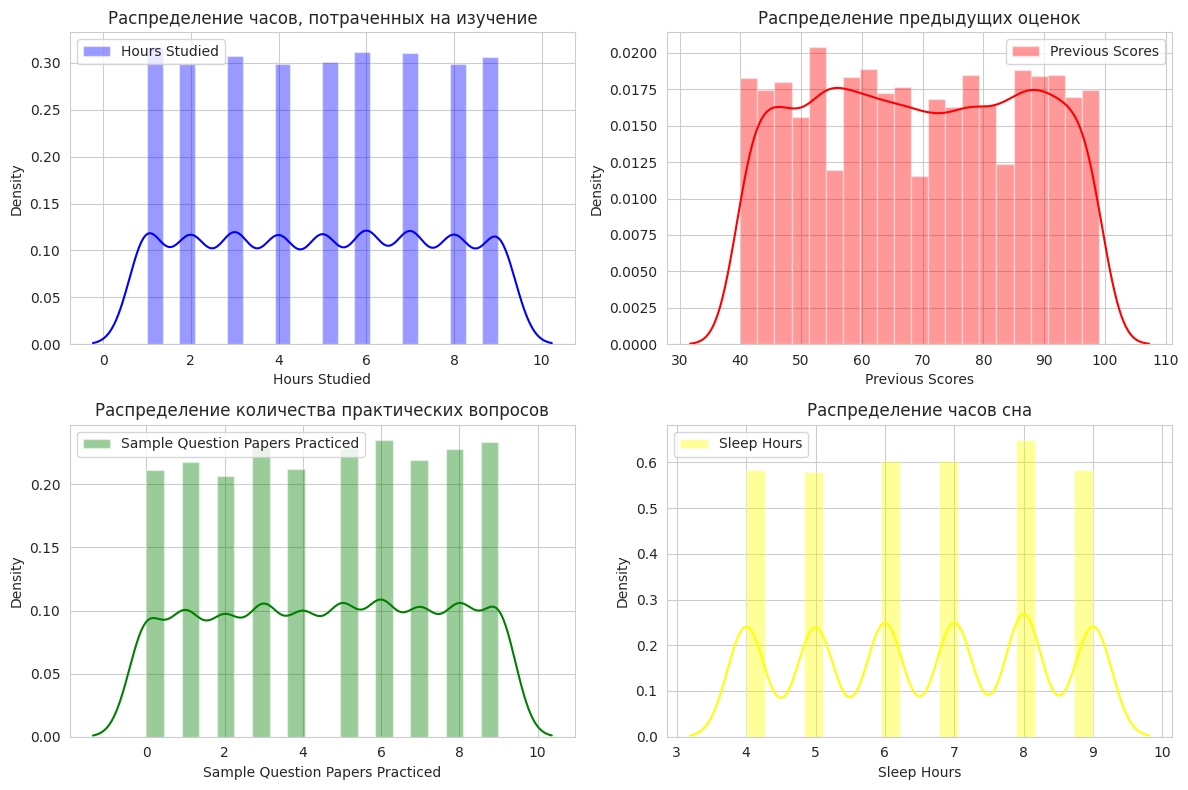

Отсутствующие значения:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


/tmp/ipykernel_4875/1865091544.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax_1["Hours Studied"] = (datax_1["Hours Studied"] - datax_1["Hours Studied"].min()) / (datax_1["Hours Studied"].max() - datax_1["Hours Studied"].min())
/tmp/ipykernel_4875/1865091544.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datax_2["Previous Scores"] = (datax_2["Previous Scores"] - datax_2["Previous Scores"].min()) / (datax_2["Previous Scores"].max() - datax_2["Previous Scores"].min())
/tmp/ipykernel_4875/1865

In [99]:
data = pd.read_csv("Student_Performance.csv")
datax = data[["Hours Studied", "Previous Scores", "Sample Question Papers Practiced", "Sleep Hours"]]
datax["Hours Studied"] = (datax["Hours Studied"] - datax["Hours Studied"].min()) / (datax["Hours Studied"].max() - datax["Hours Studied"].min())
datax["Previous Scores"] = (datax["Previous Scores"] - datax["Previous Scores"].min()) / (datax["Previous Scores"].max() - datax["Previous Scores"].min())
datax["Sample Question Papers Practiced"] = (datax["Sample Question Papers Practiced"] - datax["Sample Question Papers Practiced"].min()) / (datax["Sample Question Papers Practiced"].max() - datax["Sample Question Papers Practiced"].min())
datax["Sleep Hours"] = (datax["Sleep Hours"] - datax["Sleep Hours"].min()) / (datax["Sleep Hours"].max() - datax["Sleep Hours"].min())
datax = datax.to_numpy()
datay = data["Performance Index"].to_numpy()

print(data.describe())

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

plt.subplot(2, 2, 1)
sns.distplot(data['Hours Studied'], label='Hours Studied', color='blue')
plt.title('Распределение часов, потраченных на изучение')
plt.legend()

plt.subplot(2, 2, 2)
sns.distplot(data['Previous Scores'], label='Previous Scores', color='red')
plt.title('Распределение предыдущих оценок')
plt.legend()

plt.subplot(2, 2, 3)
sns.distplot(data['Sample Question Papers Practiced'], label='Sample Question Papers Practiced', color='green')
plt.title('Распределение количества практических вопросов')
plt.legend()

plt.subplot(2, 2, 4)
sns.distplot(data['Sleep Hours'], label='Sleep Hours', color='yellow')
plt.title('Распределение часов сна')
plt.legend()

plt.tight_layout()
plt.show()

print("Отсутствующие значения:")
print(data.isnull().sum())

x_train, x_test, y_train, y_test = train_test_split(datax, datay, random_state=1488, test_size=0.25)

datax_1 = data[["Hours Studied"]]
datax_1["Hours Studied"] = (datax_1["Hours Studied"] - datax_1["Hours Studied"].min()) / (datax_1["Hours Studied"].max() - datax_1["Hours Studied"].min())
datax_1 = datax_1.to_numpy()

datax_2 = data[["Previous Scores", "Sample Question Papers Practiced"]]
datax_2["Previous Scores"] = (datax_2["Previous Scores"] - datax_2["Previous Scores"].min()) / (datax_2["Previous Scores"].max() - datax_2["Previous Scores"].min())
datax_2["Sample Question Papers Practiced"] = (datax_2["Sample Question Papers Practiced"] - datax_2["Sample Question Papers Practiced"].min()) / (datax_2["Sample Question Papers Practiced"].max() - datax_2["Sample Question Papers Practiced"].min())
datax_2 = datax_2.to_numpy()

datax_3 = data[["Hours Studied", "Previous Scores", "Sample Question Papers Practiced", "Sleep Hours"]]
datax_3["Hours Studied"] = (datax_3["Hours Studied"] - datax_3["Hours Studied"].min()) / (datax_3["Hours Studied"].max() - datax_3["Hours Studied"].min())
datax_3["Previous Scores"] = (datax_3["Previous Scores"] - datax_3["Previous Scores"].min()) / (datax_3["Previous Scores"].max() - datax_3["Previous Scores"].min())
datax_3["Sample Question Papers Practiced"] = (datax_3["Sample Question Papers Practiced"] - datax_3["Sample Question Papers Practiced"].min()) / (datax_3["Sample Question Papers Practiced"].max() - datax_3["Sample Question Papers Practiced"].min())
datax_3["Sleep Hours"] = (datax_3["Sleep Hours"] - datax_3["Sleep Hours"].min()) / (datax_3["Sleep Hours"].max() - datax_3["Sleep Hours"].min())
datax_3 = datax_3.to_numpy()

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(datax_1, datay, random_state=1488, test_size=0.25)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(datax_2, datay, random_state=1488, test_size=0.25)
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(datax_3, datay, random_state=1488, test_size=0.25)

In [63]:
def predict(x, weights, b):
    return np.dot(x, weights)+b

def do_linear_regression(x_train, y_train):
    b = np.random.rand()
    weights = np.array([np.random.rand() for i in range(x_train.shape[1])])
    for _ in range(25):
        for i in range (x_train.shape[0]):
            pred = predict(x_train[i], weights, b)
            loss =(pred - y_train[i])**2
            
            dw = 2 * x_train[i] * (pred - y_train[i])
            db = 2 * (pred - y_train[i])
            
            weights -= 0.01 * dw
            b -= 0.01 * db
        print(loss)
    return b, weights

In [77]:
bias_1, weights_1 = do_linear_regression(x_train_1, y_train_1)
bias_2, weights_2 = do_linear_regression(x_train_2, y_train_2)
bias_3, weights_3 = do_linear_regression(x_train_3, y_train_3)

320.00069209663457
320.00071144120096
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
320.0007114412859
34.488603532776644
34.48023364831943
34.48023266125106
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
34.48023266113423
2.2411741265513547
2.248411519191719
2.248416223011503
2.248416226080393
2.2484162260824387
2.248

In [79]:
predict(x_test_1, weights_1, bias_1)
predict(x_test_2, weights_2, bias_2)
predict(x_test_3, weights_3, bias_3)

array([39.25145687, 31.22013343, 41.49922434, ..., 67.77733314,
       21.2363511 , 43.32575434])

In [80]:
y_test_1
y_test_2
y_test_3

array([37., 30., 42., ..., 69., 23., 48.])

In [51]:
weights_1
weights_2
weights_3

array([22.83009417, 60.09588758,  1.83103365,  2.5312915 ])

In [81]:
bias_1
bias_2
bias_3

11.45453009458771

In [93]:
X_train = np.column_stack((np.ones(x_train_1.shape[0]), x_train_1))
X_test = np.column_stack((np.ones(x_test_1.shape[0]), x_test_1))

coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred_train = X_train @ coefficients

residuals = y_train_1 - y_pred_train

n = len(y_train)
p = X_train.shape[1]

residual_variance = np.sum(residuals**2) / (n - p)

X_transpose_X_inv = np.linalg.inv(X_train.T @ X_train)
coeff_variance = residual_variance * X_transpose_X_inv

standard_errors = np.sqrt(np.diag(coeff_variance))

t_statistics = coefficients / standard_errors

p_values = [2 * (1 - stats.t.cdf(np.abs(t), n - p)) for t in t_statistics]

for i, (coef, t_stat, p_val) in enumerate(zip(coefficients, t_statistics, p_values)):
    print(f"Коэффициент {i}: {coef:.4f}, t-статистика = {t_stat:.4f}, p-value = {p_val:.4f}")

alpha = 0.05
significant = [p < alpha for p in p_values]

for i, sig in enumerate(significant):
    if sig:
        print(f"Коэффициент {i} значим (p < {alpha})")
    else:
        print(f"Коэффициент {i} не значим (p >= {alpha})")

Коэффициент 0: 44.2346, t-статистика = 117.3348, p-value = 0.0000
Коэффициент 1: 22.1204, t-статистика = 34.7957, p-value = 0.0000
Коэффициент 0 значим (p < 0.05)
Коэффициент 1 значим (p < 0.05)


In [94]:
X_train = np.column_stack((np.ones(x_train_2.shape[0]), x_train_2))
X_test = np.column_stack((np.ones(x_test_2.shape[0]), x_test_2))

coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred_train = X_train @ coefficients

residuals = y_train_2 - y_pred_train

n = len(y_train)
p = X_train.shape[1]

residual_variance = np.sum(residuals**2) / (n - p)

X_transpose_X_inv = np.linalg.inv(X_train.T @ X_train)
coeff_variance = residual_variance * X_transpose_X_inv

standard_errors = np.sqrt(np.diag(coeff_variance))

t_statistics = coefficients / standard_errors

p_values = [2 * (1 - stats.t.cdf(np.abs(t), n - p)) for t in t_statistics]

for i, (coef, t_stat, p_val) in enumerate(zip(coefficients, t_statistics, p_values)):
    print(f"Коэффициент {i}: {coef:.4f}, t-статистика = {t_stat:.4f}, p-value = {p_val:.4f}")

alpha = 0.05
significant = [p < alpha for p in p_values]

for i, sig in enumerate(significant):
    if sig:
        print(f"Коэффициент {i} значим (p < {alpha})")
    else:
        print(f"Коэффициент {i} не значим (p >= {alpha})")

Коэффициент 0: 24.1092, t-статистика = 107.4753, p-value = 0.0000
Коэффициент 1: 59.7880, t-статистика = 197.8272, p-value = 0.0000
Коэффициент 2: 2.4265, t-статистика = 8.7078, p-value = 0.0000
Коэффициент 0 значим (p < 0.05)
Коэффициент 1 значим (p < 0.05)
Коэффициент 2 значим (p < 0.05)


In [95]:
X_train = np.column_stack((np.ones(x_train_3.shape[0]), x_train_3))
X_test = np.column_stack((np.ones(x_test_3.shape[0]), x_test_3))

coefficients = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred_train = X_train @ coefficients

residuals = y_train_3 - y_pred_train

n = len(y_train)
p = X_train.shape[1]

residual_variance = np.sum(residuals**2) / (n - p)

X_transpose_X_inv = np.linalg.inv(X_train.T @ X_train)
coeff_variance = residual_variance * X_transpose_X_inv

standard_errors = np.sqrt(np.diag(coeff_variance))

t_statistics = coefficients / standard_errors

p_values = [2 * (1 - stats.t.cdf(np.abs(t), n - p)) for t in t_statistics]

for i, (coef, t_stat, p_val) in enumerate(zip(coefficients, t_statistics, p_values)):
    print(f"Коэффициент {i}: {coef:.4f}, t-статистика = {t_stat:.4f}, p-value = {p_val:.4f}")

alpha = 0.05
significant = [p < alpha for p in p_values]

for i, sig in enumerate(significant):
    if sig:
        print(f"Коэффициент {i} значим (p < {alpha})")
    else:
        print(f"Коэффициент {i} не значим (p >= {alpha})")

Коэффициент 0: 11.7722, t-статистика = 149.2654, p-value = 0.0000
Коэффициент 1: 22.7889, t-статистика = 307.8352, p-value = 0.0000
Коэффициент 2: 60.0999, t-статистика = 737.5059, p-value = 0.0000
Коэффициент 3: 1.7490, t-статистика = 23.2659, p-value = 0.0000
Коэффициент 4: 2.3490, t-статистика = 33.3041, p-value = 0.0000
Коэффициент 0 значим (p < 0.05)
Коэффициент 1 значим (p < 0.05)
Коэффициент 2 значим (p < 0.05)
Коэффициент 3 значим (p < 0.05)
Коэффициент 4 значим (p < 0.05)


In [90]:
y_pred = predict(x_train_1, weights_1, bias_1)
residuals_1 = y_train_1 - y_pred
residual_variance_1 = np.sum(residuals_1**2) / (x_train_1.shape[0] - x_train_1.shape[1])
print("Остаточная дисперсия:")
print(residual_variance_1)

y_pred = predict(x_train_2, weights_2, bias_2)
residuals_2 = y_train_2 - y_pred
residual_variance_2 = np.sum(residuals_2**2) / (x_train_2.shape[0] - x_train_2.shape[1])
print("Остаточная дисперсия:")
print(residual_variance_2)

y_pred = predict(x_train_3, weights_3, bias_3)
residuals_3 = y_train_3 - y_pred
residual_variance_3 = np.sum(residuals_3**2) / (x_train_3.shape[0] - x_train_3.shape[1])
print("Остаточная дисперсия:")
print(residual_variance_3)

Остаточная дисперсия:
322.1542208433205
Остаточная дисперсия:
58.92399846014384
Остаточная дисперсия:
4.313198779616491


In [91]:
t_crit = stats.t.ppf(0.975, df=(x_train_1.shape[0] - x_train_1.shape[1]))
stderr = np.sqrt(residual_variance_1 / (x_train_1.shape[0] - x_train_1.shape[1]))
conf_intervals = np.vstack((weights_1 - t_crit * stderr, weights_1 + t_crit * stderr)).T
print("Доверительные интервалы для коэффициентов модели:")
print(conf_intervals)

t_crit = stats.t.ppf(0.975, df=(x_train_2.shape[0] - x_train_2.shape[1]))
stderr = np.sqrt(residual_variance_2 / (x_train_2.shape[0] - x_train_2.shape[1]))
conf_intervals = np.vstack((weights_2 - t_crit * stderr, weights_2 + t_crit * stderr)).T
print("Доверительные интервалы для коэффициентов модели:")
print(conf_intervals)

t_crit = stats.t.ppf(0.975, df=(x_train_3.shape[0] - x_train_3.shape[1]))
stderr = np.sqrt(residual_variance_3 / (x_train_3.shape[0] - x_train_3.shape[1]))
conf_intervals = np.vstack((weights_3 - t_crit * stderr, weights_3 + t_crit * stderr)).T
print("Доверительные интервалы для коэффициентов модели:")
print(conf_intervals)

Доверительные интервалы для коэффициентов модели:
[[23.74917749 24.56178049]]
Доверительные интервалы для коэффициентов модели:
[[60.08252035 60.43007379]
 [ 1.96701812  2.31457155]]
Доверительные интервалы для коэффициентов модели:
[[22.78307195 22.8771164 ]
 [60.04886535 60.1429098 ]
 [ 1.78401143  1.87805588]
 [ 2.48426928  2.57831373]]


In [92]:
ss_total = np.sum((y_train_1- np.mean(y_train_1))**2)
ss_residual = np.sum(residuals_1**2)
r_squared = 1 - (ss_residual / ss_total)
print("Коэффициент детерминации R^2:")
print(r_squared)

ss_total = np.sum((y_train_2 - np.mean(y_train_2))**2)
ss_residual = np.sum(residuals_2**2)
r_squared = 1 - (ss_residual / ss_total)
print("Коэффициент детерминации R^2:")
print(r_squared)

ss_total = np.sum((y_train_3 - np.mean(y_train_3))**2)
ss_residual = np.sum(residuals_3**2)
r_squared = 1 - (ss_residual / ss_total)
print("Коэффициент детерминации R^2:")
print(r_squared)

Коэффициент детерминации R^2:
0.12235470309816332
Коэффициент детерминации R^2:
0.8394946562581116
Коэффициент детерминации R^2:
0.9882542459687157
